<a href="https://colab.research.google.com/github/douglaspedroni/estudo_python/blob/main/C%C3%B3pia_de_Teste_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Configuração do ambiente para rodar pyspark

In [ ]:
!pip install pyspark
!pip install delta-spark
#!pip install databricks-connect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=c39a13820b93210c209d1747003d4274cdafdeb09fbaa29b9dd0bd7c920d191c
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
#Import all packages
import pyspark
from pyspark.sql import SparkSession
from delta import *
from google.colab import drive


#Mount Your Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

#Connect Spark Context
builder = SparkSession.builder.appName("MyApp") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")\
    .config("spark.jars.packages", "io.delta:delta-core_2.12:2.4.0")

spark = configure_spark_with_delta_pip(builder).getOrCreate()

spark

Crie dois databases sendo um para camada bronze e outro para a camada silver.

O Nome dos Databases :

*   Bronze (b_nvr)
*   Silver (s_nvr)




In [ ]:
#Criar Database Bronze - Adicione o Código

spark.sql("CREATE DATABASE IF NOT EXISTS b_nvr")


DataFrame[]

In [ ]:
#Criar Database Silver - Adicione o Código

spark.sql("CREATE DATABASE IF NOT EXISTS s_nvr")

DataFrame[]

In [ ]:
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|    b_nvr|
|  default|
|    s_nvr|
+---------+



Após a criação do database bronze estar concluido.

Carregue os arquivos da folder air_plane_data e crie uma tabela delta para cada path de arquivo, igual a imagem.

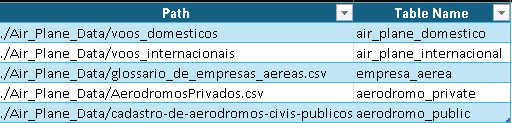


Crie um processo de carga para as tabelas air_plane_domestico e air_plane_internacional que pegue todos os arquivos disponíveis, crei um campo chamado cd_peri que contenha os campos ano e mês concatenados.

Como as tabelas não existem elas precisam ser criadas durante o processamento.


As tabelas precisam estar particionadas, e a escolha da partição fica a seu critério.
Por favor justifique o motivo?

In [ ]:
#Segue exemplo de uma amostra de carga
path = r"/content/drive/MyDrive/testesantander/voos_domesticos/2023/202301.CSV"

df = spark.read.csv(path, sep=";", header=True)
df.printSchema()
df.show()

root
 |-- ANO: string (nullable = true)
 |-- MES: string (nullable = true)
 |-- EMPRESA: string (nullable = true)
 |-- ORIGEM: string (nullable = true)
 |-- DESTINO: string (nullable = true)
 |-- TARIFA: string (nullable = true)
 |-- ASSENTOS: string (nullable = true)

+----+---+-------+------+-------+-------+--------+
| ANO|MES|EMPRESA|ORIGEM|DESTINO| TARIFA|ASSENTOS|
+----+---+-------+------+-------+-------+--------+
|2023|  2|    ABJ|  SBSV|   SIRI| 650,00|       9|
|2023|  2|    ABJ|  SBSV|   SIRI| 850,00|       4|
|2023|  2|    ABJ|  SBSV|   SIRI|1050,00|       1|
|2023|  2|    ABJ|  SBSV|   SIRI|1250,00|       1|
|2023|  2|    ABJ|  SBSV|   SIRI|1500,00|       1|
|2023|  2|    ABJ|  SBSV|   SNCL| 450,00|      14|
|2023|  2|    ABJ|  SBSV|   SNCL| 550,00|      89|
|2023|  2|    ABJ|  SBSV|   SNCL| 750,00|      49|
|2023|  2|    ABJ|  SBSV|   SNCL| 950,00|      38|
|2023|  2|    ABJ|  SBSV|   SNCL|1150,00|      20|
|2023|  2|    ABJ|  SBSV|   SNCL|1400,00|       2|
|2023|  2|    AB

In [ ]:
#Adicione o seu cõdigo aqui

#2023

path = r"/content/drive/MyDrive/testesantander/voos_domesticos/2023/*.CSV"

df = spark.read.csv(path, sep=";", header=True, inferSchema=True)
df.printSchema()
#df.show()

df = df.withColumn("cd_peri", concat(col("ano"), lit("-"), col("mes")))

df.write.format("delta") \
    .mode("overwrite") \
    .partitionBy("ANO") \
    .saveAsTable("b_nvr.air_plane_domestico")


#2024

path = r"/content/drive/MyDrive/testesantander/voos_domesticos/2024/*.CSV"

df = spark.read.csv(path, sep=";", header=True, inferSchema=True)
df.printSchema()
#df.show()

df = df.withColumn("cd_peri", concat(col("ano"), lit("-"), col("mes")))

df.write.format("delta") \
    .mode("overwrite") \
    .partitionBy("ANO") \
    .saveAsTable("b_nvr.air_plane_domestico")

In [ ]:
#Mostre a lista de tabelas criadas
spark.sql("SELECT * FROM b_nvr.air_plane_domestico").show()

+----+---+-------+------+-------+-------+--------+
| ANO|MES|EMPRESA|ORIGEM|DESTINO| TARIFA|ASSENTOS|
+----+---+-------+------+-------+-------+--------+
|2023|  8|    ABJ|  SBSV|   SIRI| 550,00|       2|
|2023|  8|    ABJ|  SBSV|   SIRI| 650,00|       2|
|2023|  8|    ABJ|  SBSV|   SIRI| 850,00|       1|
|2023|  8|    ABJ|  SBSV|   SIRI|1500,00|       1|
|2023|  8|    ABJ|  SBSV|   SNCL| 450,00|      14|
|2023|  8|    ABJ|  SBSV|   SNCL| 550,00|      69|
|2023|  8|    ABJ|  SBSV|   SNCL| 750,00|      55|
|2023|  8|    ABJ|  SBSV|   SNCL| 950,00|      21|
|2023|  8|    ABJ|  SBSV|   SNCL|1150,00|      20|
|2023|  8|    ABJ|  SIRI|   SBSV| 550,00|       2|
|2023|  8|    ABJ|  SIRI|   SBSV| 650,00|       3|
|2023|  8|    ABJ|  SIRI|   SBSV| 850,00|       1|
|2023|  8|    ABJ|  SNCL|   SBSV| 450,00|      17|
|2023|  8|    ABJ|  SNCL|   SBSV| 550,00|      76|
|2023|  8|    ABJ|  SNCL|   SBSV| 750,00|      59|
|2023|  8|    ABJ|  SNCL|   SBSV| 950,00|      38|
|2023|  8|    ABJ|  SNCL|   SBS

In [ ]:
#Adicione o seu cõdigo aqui

#2023

path = r"content/drive/MyDrive/testesantander/voos_internacionais/2023/*.CSV"

df = spark.read.csv(path, sep=";", header=True, inferSchema=True)
df.printSchema()
#df.show()

df = df.withColumn("cd_peri", concat(col("ano"), lit("-"), col("mes")))

df.write.format("delta") \
    .mode("overwrite") \
    .partitionBy("ANO") \
    .saveAsTable("b_nvr.air_plane_internacional")


#2024

path = r"content/drive/MyDrive/testesantander/voos_internacionais/2024/*.CSV"

df = spark.read.csv(path, sep=";", header=True, inferSchema=True)
df.printSchema()
#df.show()

df = df.withColumn("cd_peri", concat(col("ano"), lit("-"), col("mes")))

df.write.format("delta") \
    .mode("overwrite") \
    .partitionBy("ANO") \
    .saveAsTable("b_nvr.air_plane_internacional")

In [ ]:
#Mostre a lista de tabelas criadas
spark.sql("SELECT * FROM b_nvr.air_plane_internacional").show()

Crie a tabela empresa_aerea e faça limpeza nos dados para que fique apenas os campos sigla, nome_empresa e tipo_origem.
Esta tabela deve ser criada no database bronze.

In [ ]:
#exemplo de carga

path = r"/content/drive/MyDrive/raia_drogasil/Air_Plane_Data/glossario_de_empresas_aereas.csv"

df = spark.read.csv(path, sep=",", header=True)
df.printSchema()
df.show()



In [ ]:
#Adicione o seu cõdigo aqui

data_directory = "/content/drive/MyDrive/raia_drogasil/Air_Plane_Data/"
df = spark.read.csv(f"{data_directory}glossario_de_empresas_aereas.csv", header=True, inferSchema=True)

# 2. Limpar os dados - selecionar apenas os campos desejados
df_empresa_aerea = df.select("sigla", "nome_empresa", "tipo_origem")

# 3. Criar a tabela empresa_aerea no database bronze
df_empresa_aerea.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("b_nvr.bronze.empresa_aerea")

# 4. Verificação
spark.sql("SELECT * FROM b_nvr.bronze.empresa_aerea").show()

# Encerrar a Spark Session
spark.stop()

# Silver

Com as três tabelas bronze criadas será necessário criar uma tabela que tenha o nome de air_plane no database silver que tenha as duas tabelas ( air_plane_domestico e air_plane_internacional) e que tenha um campos onde é possível identifica o tipo de voo.
Para identificar o nome da empresa áerea enriqueça com as informações da tabela empresa_aerea (nome_empresa).

A tabela precisa ser particionada.

In [ ]:
#Adicione código aqui

df_domestico = spark.table("b_nvr.bronze.air_plane_domestico")
df_internacional = spark.table("b_nvr.bronze.air_plane_internacional")
df_empresa_aerea = spark.table("b_nvr.bronze.empresa_aerea")

df_domestico = df_domestico.withColumn("tipo_voo", lit("domestico"))
df_internacional = df_internacional.withColumn("tipo_voo", lit("internacional"))

df_unido = df_domestico.unionByName(df_internacional)

df_final = df_unido.join(df_empresa_aerea, df_unido.empresa == df_empresa_aerea.sigla, "left") \
    .select(df_unido["*"], df_empresa_aerea.nome_empresa)

df_final.write.format("delta") \
    .mode("overwrite") \
    .partitionBy("ano") \
    .saveAsTable("s_nvr.silver.air_plane")

spark.sql("SELECT * FROM s_nvr.silver.air_plane").show()

Identifique por ano a empresa que mais vendeu assentos e também a que mais pagou tarifas por tipo de voo
?

In [ ]:
#Adicione código aqui

resultado_assentos = spark.sql("""
    SELECT
        ano,
        empresa,
        SUM(assentos) AS total_assentos
    FROM
        b_nvr.silver.air_plane
    GROUP BY
        ano, empresa
    ORDER BY
        ano, total_assentos DESC
""")

Conforme visto, o código de carga dos arquivos csv se repetem.
Qual seria a melhor solução para reduzir o código?
e como isso ficaria escrito?

In [ ]:
Podemos encapsular a lógica em função para otimizar.

#trecho de como ficaria.

def carregar_dados_csv(data_directory, tabela, particao_col):